In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Load Dataset
df = pd.read_csv("boston_housing.csv")

# Check for missing values
if df.isnull().sum().any():
    print("Warning: Missing values detected!")

# Splitting features and target
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
df.shape

(506, 14)

In [3]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Define the Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])

C:\Users\shrey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=200, batch_size=64, verbose=2, callbacks=[early_stop])

Epoch 1/200
7/7 - 2s - 297ms/step - loss: 580.7090 - mae: 22.2176 - val_loss: 489.9496 - val_mae: 20.4291
Epoch 2/200
7/7 - 0s - 31ms/step - loss: 547.4164 - mae: 21.4563 - val_loss: 457.9496 - val_mae: 19.6277
Epoch 3/200
7/7 - 0s - 31ms/step - loss: 512.0874 - mae: 20.5991 - val_loss: 421.5067 - val_mae: 18.6741
Epoch 4/200
7/7 - 0s - 31ms/step - loss: 470.8041 - mae: 19.5563 - val_loss: 379.2563 - val_mae: 17.5195
Epoch 5/200
7/7 - 0s - 29ms/step - loss: 422.3875 - mae: 18.2813 - val_loss: 330.3353 - val_mae: 16.1645
Epoch 6/200
7/7 - 0s - 32ms/step - loss: 365.1076 - mae: 16.7437 - val_loss: 274.8949 - val_mae: 14.5204
Epoch 7/200
7/7 - 0s - 29ms/step - loss: 302.9394 - mae: 14.9712 - val_loss: 215.0897 - val_mae: 12.6858
Epoch 8/200
7/7 - 0s - 29ms/step - loss: 236.3480 - mae: 12.9025 - val_loss: 157.1616 - val_mae: 10.6669
Epoch 9/200
7/7 - 0s - 23ms/step - loss: 174.4016 - mae: 10.7650 - val_loss: 106.5619 - val_mae: 8.5998
Epoch 10/200
7/7 - 0s - 24ms/step - loss: 121.9016 - ma

In [6]:
# Evaluate Model
loss, mae = model.evaluate(X_test, y_test, verbose=2)
print(f"Test MSE: {loss:.4f}, Test MAE: {mae:.4f}")


4/4 - 0s - 25ms/step - loss: 12.0196 - mae: 2.2938
Test MSE: 12.0196, Test MAE: 2.2938


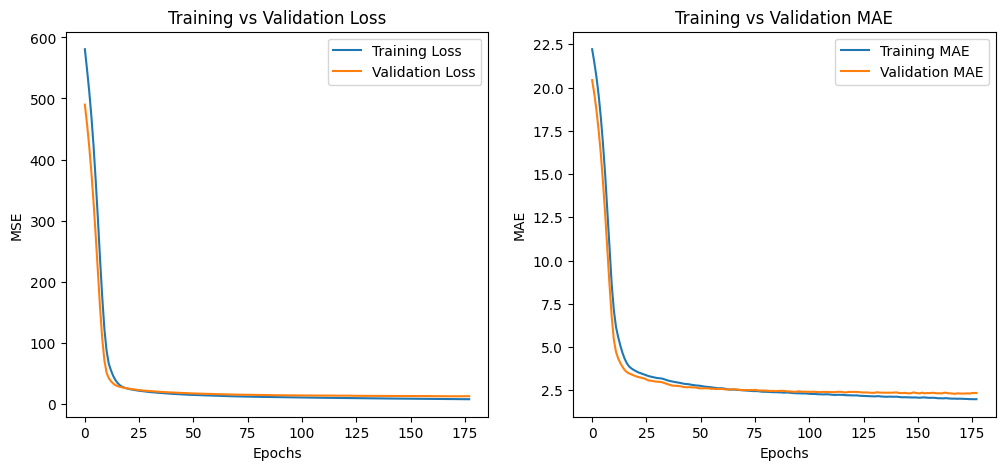

In [7]:
# Plot Training History
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.title('Training vs Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Training vs Validation MAE')

plt.show()